<h1 align=\"center\"><font color='green'><font size=\"6\">Logistic Regression</font> </h1>

<div style="background-color: #90EE90;">.</div>  </div>

 - Logistic regression is a supervised machine learning technique that employs statistical methods for binary classification, predicting the probability of a binary outcome (0 or 1) based on one or more predictor variables. 
 - Despite its name, it is used for classification tasks rather than regression.

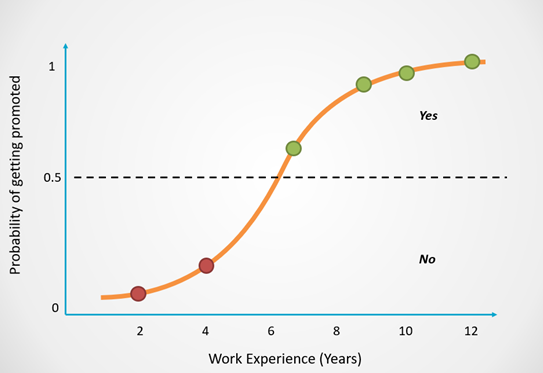

In [1]:
#Anything above threshold 0.5 is considered Yes and below it is considered No.

#### Applications
 - Medical diagnosis: Predicting the likelihood of a disease based on patient symptoms and test results.   
  - Customer churn: Predicting whether a customer will discontinue their service.   
 - Email spam filtering: Identifying whether an email is spam or not.   
 - Credit risk assessment: Assessing the risk of a loan default.


####  Steps to Use Logistic Regression in Scikit-Learn

####  What is Scikit-Learn?
- Simple and efficient tools for predictive data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

In [3]:
#Importing necessary libraries and Algorithm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#Creating a dataset to predict whether a customer will buy a product based on age and salary
np.random.seed(42)
data = {'age': np.random.randint(20,60, size = 100),
        'salary': np.random.randint(30000,70000, size = 100),
        'buy_product': np.random.choice([1,0], size=100)} 
#0 means customer won't buy a product while 1 means customer will buy a product

In [5]:
#creating dataframe of dataset
df = pd.DataFrame(data)
df.head()

,age,salary,buy_product
0,58,53599,0
1,48,65222,1
2,34,41837,0
3,27,44039,1
4,40,60818,1


In [6]:
#Splitting the dataset into features (age, Salary) and target (buy product).
# Assigning columns to Features(X) and target(y) 
X = df[['age', 'salary']]
y = df['buy_product']
X

,age,salary
0,58,53599
1,48,65222
2,34,41837
3,27,44039
4,40,60818
...,...,...
95,28,32811
96,27,36546
97,31,64754
98,53,60206


In [7]:
#Performing an 80/20 split to create training and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#Initializing the Logistic Regression model
logreg = LogisticRegression()

In [9]:
#Training the model
logreg.fit(X_train,y_train)

LogisticRegression()

In [10]:
#Making predictions
y_pred = logreg.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0])

In [11]:
#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Accuracy: 0.4
Precision: 0.2727272727272727
Recall: 0.42857142857142855
F1-Score: 0.33333333333333326


In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared Error: {mse}")
print(f"R-squared: {r2}")

Mean squared Error: 0.6
R-squared: -1.6373626373626373


In [14]:
#Applying the model in new data 
new_data = np.array([[25, 20000]]) # Aged 25 with 20000 salary
predicted_buying_tendency = logreg.predict(new_data)

print(f"The buying tendency of customer aged 25 with 20,000 salary is : {predicted_buying_tendency[0]}")

The buying tendedncy of customer aged 25 with 20,000 salary is : 0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [15]:
new_data = np.array([[38, 65000]]) # Aged 38 with 65000 salary
predicted_buying_tendency = logreg.predict(new_data)

print(f"The buying tendency of customer aged 38 with 65000 salary is : {predicted_buying_tendency[0]}")

The buying tendedncy of customer aged 38 with 65000 salary is : 1


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


We are getting warning because:
- we trained the model with data that had feature names.
 - Now, we're trying to use the model to predict on new data that doesn't have feature names.

In [20]:
new_data_df = pd.DataFrame({'age':[38], 'salary': [65000]})
predict_df = logreg.predict(new_data_df)
print(f"The buying tendency of customer aged 38 with 65000 salary is : {predict_df[0]}")

The buying tendedncy of customer aged 38 with 65000 salary is : 1
